In [51]:
!pip install pandas-datareader
!pip install tensorflow
import math
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import numpy as np
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [52]:
start= dt.datetime(2009,5,1)
end = dt.datetime(2022,5,31)
company= '1883.HK'
data = web.DataReader(company,'yahoo',start,end)

In [81]:
data.shape

(3229, 6)

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))


In [54]:
prediction_days =60

In [55]:
x_train = []
y_train=[]

In [56]:
for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [57]:
x_train, y_train =np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [59]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [84]:
model.fit(x_train, y_train, epochs=25 , batch_size=32)

Epoch 1/25
100/100 [==============================] - 4s 38ms/step - loss: 8.5580e-04
Epoch 2/25
100/100 [==============================] - 4s 37ms/step - loss: 8.5789e-04
Epoch 3/25
100/100 [==============================] - 4s 36ms/step - loss: 0.0011
Epoch 4/25
100/100 [==============================] - 4s 37ms/step - loss: 7.7243e-04
Epoch 5/25
100/100 [==============================] - 4s 38ms/step - loss: 7.7794e-04
Epoch 6/25
100/100 [==============================] - 4s 38ms/step - loss: 7.7819e-04
Epoch 7/25
100/100 [==============================] - 4s 38ms/step - loss: 6.8490e-04
Epoch 8/25
100/100 [==============================] - 4s 37ms/step - loss: 7.5650e-04
Epoch 9/25
100/100 [==============================] - 4s 37ms/step - loss: 7.1624e-04
Epoch 10/25
100/100 [==============================] - 4s 37ms/step - loss: 6.5971e-04
Epoch 11/25
100/100 [==============================] - 4s 39ms/step - loss: 7.6823e-04
Epoch 12/25
100/100 [==============================] - 4

In [76]:
test_start = dt.datetime(2009,5,1)
test_end = dt.datetime(2022,5,31)

In [62]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

In [63]:
actual_prices= test_data['Close'].values

In [64]:
total_dataset =pd.concat((data['Close'], test_data['Close']), axis=0)

In [65]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [66]:
model_inputs= model_inputs.reshape(-1,1)

In [67]:
model_inputs= scaler.transform(model_inputs)

In [68]:
x_test =[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [69]:
x_test =np.array(x_test)
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1) )

In [70]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

23/23 [==============================] - 1s 12ms/step


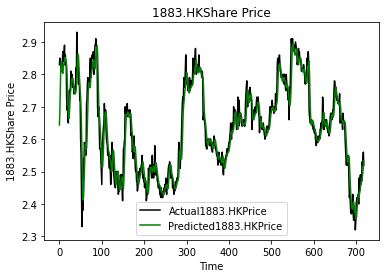

In [71]:
plt.plot(actual_prices, color="black", label=f"Actual{company}Price")
plt.plot(predicted_prices, color="green",label=f"Predicted{company}Price")
plt.title(f"{company}Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company}Share Price')
plt.legend()
plt.show()




In [72]:
real_data = [ model_inputs[len(model_inputs) + 5 - prediction_days:len(model_inputs + 5 ),0]]

In [73]:
real_data = np.array(real_data)             
            

In [74]:
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1)) 

In [75]:

#2022/11/28 trial
prediction = model.predict(real_data)
prediction =scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 772ms/step
Prediction: [[2.5385175]]
